#Implementing an FCNN from Scratch using TensorFlow

Implement the following computations using TensorFlow:
1. Load the the MNIST dataset from tensorflow as x train, y train, x test and y test.
The Modified National Institute of Standards and Technology (MNIST) dataset
contains grayscale images of handwritten digits. The training set consists of 60,000
images and the test set contains 10,000 images. The label of each image is a digit
between 0 and 9. Each image has a size of 28 × 28, consisting of 784 pixel values,
where each pixel value ∈ [0, 255] with 0 corresponds to black, 255 to white, and
values in between representing various shades of gray.
2. Form a matrix U of shape (m, n) using TensorFlow by reshaping the images in
x train to be 1D arrays of 784 (28 × 28) pixel values (Flatten the images) where
m = 60, 000 is the number of training examples (training images) and n = 784 is
the number of features (no. of pixel values)
3. Compute X as the transpose of U.
4. Normalize the pixel values of X to [0, 1] by dividing by 255.
5. Form a matrix Y of size m corresponding to the labels ∈ [0, 9] of images by transposing y train.
6. Form a matrix V by reshaping the images in x test to be 1D arrays of 784 (28 × 28)
pixel values (Flatten the images).
7. Compute Xtest as the transpose of V .
8. Normalize the pixel values of Xtest to [0, 1] by dividing by 255.
9. Form a matrix Y test of size m corresponding to the labels ∈ [0, 9] of images by
transposing y test.
10. Select an image from X and display it. Also, display the corresponding label from
Y.
11. Set the hyper parameters: p = 10, the no. of neurons in hidden layer, q = 10,
the no. of neurons in output layer (corresponding 10 labels in one-hot encoding
format), learning rate α = 0.01 and the number of training epochs (iterations over
the dataset) as 1000.
12. Create a matrix W1 of shape (p, n) and initialize it as W1 = N (0, 1) ×
q
1
n
, where
N (0, 1) represents a matrix of random values drawn from a normal distribution with
mean 0 and standard deviation 1.
13. Initialize the vector B1 of shape (p, 1) to zeros.
14. Initialize the matrix W2 of shape (q, p) as W2 = N (0, 1) ×
q1
p
.
15. Initialize the vector B2 of shape (q, 1) to zeros.
16. Perform the following forward propagation and backpropagation computations iteratively (No. of epochs=1000):

  (a) Z1 = W1 · X + B1 (Matrix Multiplication)

  (b) A1 = ReLU(Z1) where ReLU(x) is a function that returns 0 for negative values
and the input value itself otherwise.

  (c) Z2 = W2 · A1 + B2

  (d) A2 = softmax(Z2) where $
\text{softmax}(x) = \frac{e^{x_i}}{\sum_j e^{x_j}}
$

  (e) Get the predicted labels from the output of A2 (index of the maximum value).

  (f) Find the accuracy of the predictions by comparing them to the true labels Y
and print the progress in every 100 epochs.

  (g) Compute the cross-entropy loss using TensorFlow’s tf.nn.softmax cross entropy with logits
function.

  (h) dZ2 = A2 − one hot Y where one hot Y is the one-hot encoded form of Y .

  (i) $ dA2 = W2 ^ T · dZ2 $

  (j) $ dW2 = \frac 1 m· dZ2 · A1^T $

  (k) $ dB2 = \frac 1 m \sum Z2 $ (sum along the columns)

  (l) dZ1 = dA2◦ReLU'(Z1) where ReLU'(x) returns 1 for positive values
and 0 otherwise, and ◦ indicates element-wise multiplication.

  (m) $ dA1 = W1^T · dZ1 $

  (n) $ dB1 = \frac 1 m \sum dZ1 $ (sum along the columns)

  (o) $ dW1 = \frac 1 m · dZ1 · X^T $

  (p) Update and print W1, B1, W2, and B2 for α = 0.01:

   - i. W1 = W1 − α · dW1

   - ii. B1 = B1 − α · dB1

   - iii. W2 = W2 − α · dW2

   - iv. B2 = B2 − α · dB2

17. Use tensorflow GradientTape() to automatically calculate the gradients from steps
(h) to (o) and redo the training steps.
18. Select one test image from Xtest, display it, reshape it to n × 1, perform forward
propagation computations and predict the label. Check whether the prediction is
correct.
19. Use the entire Xtest and perform the forward propagation computations and predict
the accuracy of the model.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
m_train = x_train.shape[0]
n = 28 * 28
U = tf.reshape(x_train, shape=(m_train, n))
X = tf.transpose(U)
X = tf.cast(X, tf.float32) / 255.0
Y = tf.reshape(y_train, shape=(1, m_train))
m_test = x_test.shape[0]
V = tf.reshape(x_test, shape=(m_test, n))
Xtest = tf.transpose(V)
Xtest = tf.cast(Xtest, tf.float32) / 255.0
Ytest = tf.reshape(y_test, shape=(1, m_test))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


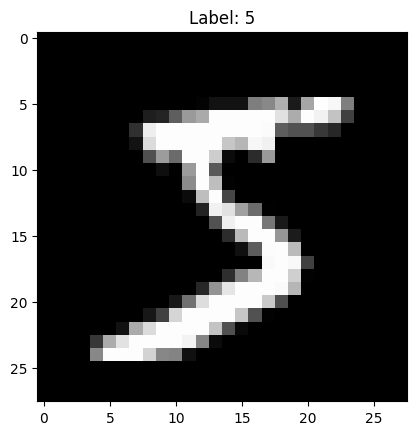

In [ ]:
idx = 0
image = tf.reshape(X[:, idx], shape=(28, 28))
plt.imshow(image, cmap='gray')
plt.title(f"Label: {Y[0, idx].numpy()}")
plt.show()


In [ ]:
p = 10
q = 10
alpha = 0.01
epochs = 1000

In [ ]:
W1 = tf.Variable(tf.random.normal(shape=(p, n), mean=0.0, stddev=1.0) * (q ** (1/2) / n))
B1 = tf.Variable(tf.zeros(shape=(p, 1)))
W2 = tf.Variable(tf.random.normal(shape=(q, p), mean=0.0, stddev=1.0) * (q ** (1/2) / p))
B2 = tf.Variable(tf.zeros(shape=(q, 1)))


In [ ]:

def relu(Z):
    return tf.maximum(Z, 0)

def relu_derivative(Z):
    return tf.cast(Z > 0, tf.float32)

def softmax(Z):
    exp_Z = tf.exp(Z - tf.reduce_max(Z, axis=0, keepdims=True))
    return exp_Z / tf.reduce_sum(exp_Z, axis=0, keepdims=True)

def one_hot(Y, num_classes=10):
    Y_flat = tf.reshape(Y, [-1])
    return tf.one_hot(Y_flat, depth=num_classes)

def one_hot_T(Y, num_classes=10):
    oh = one_hot(Y, num_classes)
    return tf.transpose(oh)

m = m_train

In [ ]:
for epoch in range(1, epochs + 1):
    with tf.GradientTape() as tape:
        Z1 = tf.matmul(W1, X) + B1
        A1 = relu(Z1)
        Z2 = tf.matmul(W2, A1) + B2
        A2 = softmax(Z2)
        Y_onehot = one_hot_T(Y, q)
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf.transpose(Y_onehot), logits=tf.transpose(Z2)))

    dZ2 = A2 - Y_onehot
    dW2 = (1/m) * tf.matmul(dZ2, A1, transpose_b=True)
    dB2 = (1/m) * tf.reduce_sum(dZ2, axis=1, keepdims=True)
    dA1 = tf.matmul(W2, dZ2, transpose_a=True)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1/m) * tf.matmul(dZ1, X, transpose_b=True)
    dB1 = (1/m) * tf.reduce_sum(dZ1, axis=1, keepdims=True)

    W1.assign_sub(alpha * dW1)
    B1.assign_sub(alpha * dB1)
    W2.assign_sub(alpha * dW2)
    B2.assign_sub(alpha * dB2)

    if epoch % 100 == 0:
        preds = tf.argmax(A2, axis=0, output_type=tf.int32)
        correct = tf.equal(preds, tf.cast(Y[0], tf.int32))
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
        print(f"Epoch {epoch}, Loss: {loss.numpy():.4f}, Accuracy: {accuracy.numpy()*100:.2f}%")

print("\nTraining with GradientTape automatic differentiation...")


Epoch 100, Loss: 2.0550, Accuracy: 42.53%
Epoch 200, Loss: 1.8844, Accuracy: 48.87%
Epoch 300, Loss: 1.7117, Accuracy: 58.54%
Epoch 400, Loss: 1.5212, Accuracy: 67.02%
Epoch 500, Loss: 1.3345, Accuracy: 71.14%
Epoch 600, Loss: 1.1607, Accuracy: 74.10%
Epoch 700, Loss: 0.9945, Accuracy: 78.14%
Epoch 800, Loss: 0.8433, Accuracy: 82.09%
Epoch 900, Loss: 0.7321, Accuracy: 83.96%
Epoch 1000, Loss: 0.6581, Accuracy: 84.82%

Training with GradientTape automatic differentiation...


In [ ]:

W1.assign(tf.random.normal(shape=(p, n), mean=0.0, stddev=1.0) * (q ** (1/2) / n))
B1.assign(tf.zeros(shape=(p, 1)))
W2.assign(tf.random.normal(shape=(q, p), mean=0.0, stddev=1.0) * (q ** (1/2) / p))
B2.assign(tf.zeros(shape=(q, 1)))

<tf.Variable 'UnreadVariable' shape=(10, 1) dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [ ]:
for epoch in range(1, epochs + 1):
    with tf.GradientTape() as tape:
        Z1 = tf.matmul(W1, X) + B1
        A1 = relu(Z1)
        Z2 = tf.matmul(W2, A1) + B2
        A2 = softmax(Z2)
        Y_onehot = one_hot_T(Y, q)
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf.transpose(Y_onehot), logits=tf.transpose(Z2)))

    grads = tape.gradient(loss, [W1, B1, W2, B2])
    W1.assign_sub(alpha * grads[0])
    B1.assign_sub(alpha * grads[1])
    W2.assign_sub(alpha * grads[2])
    B2.assign_sub(alpha * grads[3])

    if epoch % 100 == 0:
        preds = tf.argmax(A2, axis=0, output_type=tf.int32)
        correct = tf.equal(preds, tf.cast(Y[0], tf.int32))
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
        print(f"Epoch {epoch}, Loss: {loss.numpy():.4f}, Accuracy: {accuracy.numpy()*100:.2f}%")


Epoch 100, Loss: 1.7792, Accuracy: 53.91%
Epoch 200, Loss: 1.4631, Accuracy: 65.27%
Epoch 300, Loss: 1.2204, Accuracy: 71.58%
Epoch 400, Loss: 1.0432, Accuracy: 75.02%
Epoch 500, Loss: 0.9166, Accuracy: 77.23%
Epoch 600, Loss: 0.8239, Accuracy: 79.22%
Epoch 700, Loss: 0.7536, Accuracy: 80.71%
Epoch 800, Loss: 0.6985, Accuracy: 81.88%
Epoch 900, Loss: 0.6540, Accuracy: 82.86%
Epoch 1000, Loss: 0.6172, Accuracy: 83.88%


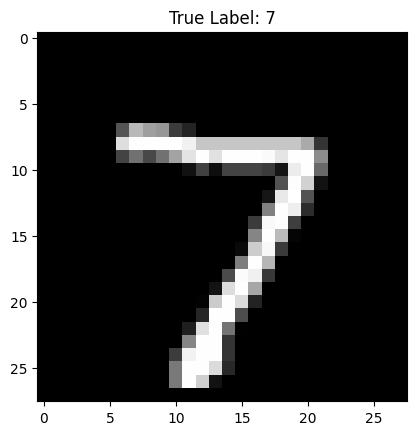

Predicted Label: [7]
Correct prediction!
Test Set Accuracy: 84.88%


In [ ]:

test_idx = 0
test_image = tf.reshape(Xtest[:, test_idx], (n,1))
plt.imshow(tf.reshape(test_image, (28,28)), cmap='gray')
plt.title(f"True Label: {Ytest[0, test_idx].numpy()}")
plt.show()

Z1_test = tf.matmul(W1, test_image) + B1
A1_test = relu(Z1_test)
Z2_test = tf.matmul(W2, A1_test) + B2
A2_test = softmax(Z2_test)

pred_label = tf.argmax(A2_test, axis=0).numpy()
print(f"Predicted Label: {pred_label}")
print("Correct prediction!" if pred_label == Ytest[0, test_idx].numpy() else "Incorrect prediction.")

Z1_test_all = tf.matmul(W1, Xtest) + B1
A1_test_all = relu(Z1_test_all)
Z2_test_all = tf.matmul(W2, A1_test_all) + B2
A2_test_all = softmax(Z2_test_all)

preds_test = tf.argmax(A2_test_all, axis=0, output_type=tf.int32)
correct_test = tf.equal(preds_test, tf.cast(Ytest[0], tf.int32))
accuracy_test = tf.reduce_mean(tf.cast(correct_test, tf.float32))
print(f"Test Set Accuracy: {accuracy_test.numpy()*100:.2f}%")